In [3]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

### 数据

In [4]:
# data
iris = datasets.load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size = 0.3, random_state = 0)
class_names = iris.target_names

### 分类模型

In [6]:
# classifier
svc = SVC(kernel = 'linear', C = 0.01)
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
print(y_test)
print(y_pred)

[2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 1 1 1 2 0 2 0 0]
[2 1 0 2 0 2 0 2 2 1 2 2 2 2 2 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2 1 1 2 0 2 0 0]


### 模型表现 

In [7]:
# confusion matrix
np.set_printoptions(precision = 2)
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[16  0  0]
 [ 0 11  7]
 [ 0  0 11]]


正规化后的混淆矩阵：
[[1.   0.   0.  ]
 [0.   0.61 0.39]
 [0.   0.   1.  ]]
没有进行正规化的混淆矩阵：
[[16  0  0]
 [ 0 11  7]
 [ 0  0 11]]


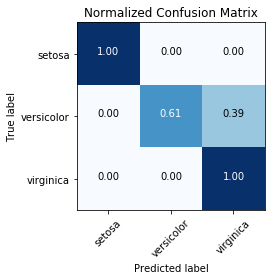

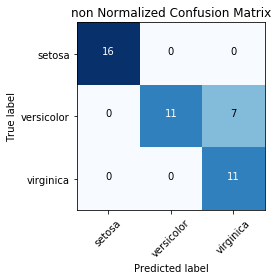

In [8]:
# print and plot  confusion matrix
def plot_confusion_matrix(cm, classes, normalize = False, title = "Confusion Matrix", cmap = plt.cm.Blues):
    """
    # print and plot the confusion matrix
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis = 1)[:, np.newaxis]
        print('正规化后的混淆矩阵：')
    else:
        print('没有进行正规化的混淆矩阵：')
    print(cm)
    
    plt.imshow(cm, interpolation = 'nearest', cmap = cmap)
    plt.title(title)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation = 45)
    plt.yticks(tick_marks, classes)
    
    fmt = '0.2f' if normalize else 'd'
    thresh = cm.max() / 2.0
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, 
                 i,
                 format(cm[i, j], fmt),
                 horizontalalignment = 'center',
                 color = 'white' if cm[i, j] > thresh else 'black')
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.tight_layout()

plt.figure()
plot_confusion_matrix(cm, classes = class_names, normalize = True, title = "Normalized Confusion Matrix")
plt.figure()
plot_confusion_matrix(cm, classes = class_names, normalize = False, title = "non Normalized Confusion Matrix")
plt.show()